n_gen  |  n_eval  |     f_avg     |     f_min     |     f_gap    
     1 |      100 |  0.8314974785 |  0.3870993357 |  0.3870993357
     2 |      200 |  0.5715705191 |  0.3057138275 |  0.3057138275
     3 |      300 |  0.4550327555 |  0.2411375542 |  0.2411375542
     4 |      400 |  0.3660527555 |  0.2155814787 |  0.2155814787
     5 |      500 |  0.2947869167 |  0.1341235205 |  0.1341235205
     6 |      600 |  0.2294618212 |  0.0976818958 |  0.0976818958
     7 |      700 |  0.1695381744 |  0.0427806264 |  0.0427806264
     8 |      800 |  0.1220873448 |  0.0229230788 |  0.0229230788
     9 |      900 |  0.0859605984 |  0.0229230788 |  0.0229230788
    10 |     1000 |  0.0602567663 |  0.0205097034 |  0.0205097034
    11 |     1100 |  0.0438274420 |  0.0101914617 |  0.0101914617
    12 |     1200 |  0.0306870814 |  0.0101914617 |  0.0101914617
    13 |     1300 |  0.0218382714 |  0.0088134417 |  0.0088134417
    14 |     1400 |  0.0155204754 |  0.0064739505 |  0.0064739505
    15 |  

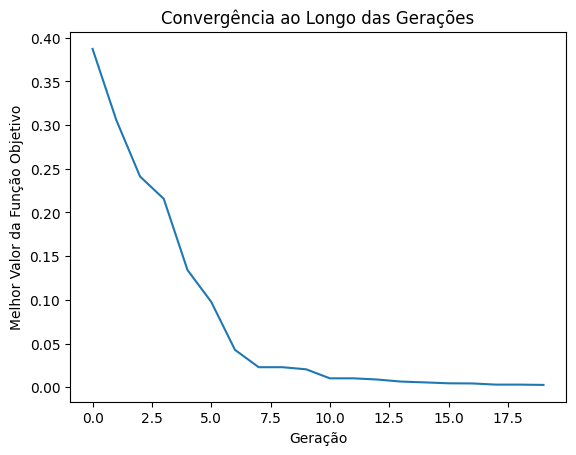

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from pymoo.algorithms.soo.nonconvex.ga import GA
from pymoo.problems import get_problem
from pymoo.core.callback import Callback
from pymoo.optimize import minimize

# Criando a classe de Callback para armazenar o melhor valor da função objetivo
class MyCallback(Callback):

    def __init__(self):
        super().__init__()
        self.data["melhor"] = []  # Lista para armazenar os melhores valores

    def notify(self, algorithm):
        # Salva o menor valor de F da população em cada geração
        self.data["melhor"].append(algorithm.pop.get("F").min())

# Definindo um problema de otimização
problem = get_problem("sphere")

# Escolhendo o algoritmo Genético (GA)
algorithm = GA(pop_size=100)

# Executando a otimização com callback ativado
res = minimize(problem,
               algorithm,
               ('n_gen', 20),  # Rodar por 20 gerações
               seed=1,
               callback=MyCallback(),
               verbose=True)

# Obtendo os valores armazenados pelo Callback
val = res.algorithm.callback.data["melhor"]

# Criando o gráfico de convergência
plt.plot(np.arange(len(val)), val)
plt.xlabel("Geração")
plt.ylabel("Melhor Valor da Função Objetivo")
plt.title("Convergência ao Longo das Gerações")
plt.show()


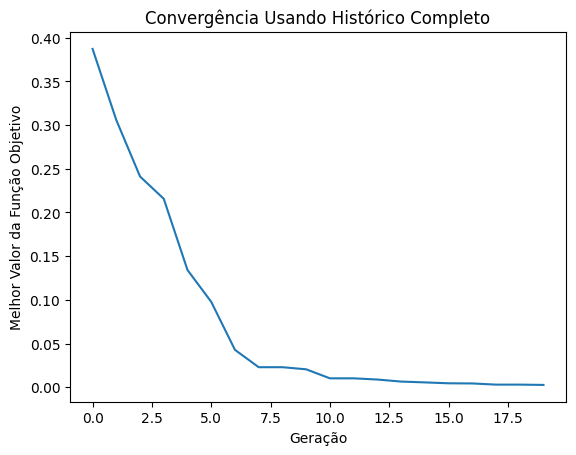

In [2]:
res = minimize(problem,
               algorithm,
               ('n_gen', 20),
               seed=1,
               save_history=True)

# Obtendo os melhores valores de cada geração
val = [e.opt.get("F")[0] for e in res.history]

# Criando o gráfico
plt.plot(np.arange(len(val)), val)
plt.xlabel("Geração")
plt.ylabel("Melhor Valor da Função Objetivo")
plt.title("Convergência Usando Histórico Completo")
plt.show()
